# Personal Project 1: 
## <font color='red'>IEEE Computational Intelligence Society Fraud Detection</font> [(Kaggle)](https://www.kaggle.com/c/ieee-fraud-detection/overview)

#### `(2/2/2022 -        )`
#### Jey Kim (jeonghyeop.kim@gmail.com)

Vesta Corporation provided the dataset for this competition



## <font color='blue'> STEP 0: Read Data description carefully</font>
**DATA DESCRIPTION: [link](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)**


#### 1. Transaction Table
- TransactionID
- TransactionDT : timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical features:
- ProductCD
- card1-card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1-M9

#### 2. Identity Table

- TransactionID
- id_01-38 
> (network: IP,ISP,Proxy,etc; digital signature: UA,browser, os, version,etc)
- DeviceType
- DeviceInfo

Categorical Features:
- DeviceType
- DeviceInfo
- id_12 - id_38

## <font color='blue'> STEP 1: Import libraries & Read data sets</font>

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load data sets
datapath="~/main/kaggle/ieee_cis_fraud/"

file_train_transaction="train_transaction.csv"
file_train_identity="train_identity.csv"

file_test_transaction="test_transaction.csv"
file_test_identity="test_identity.csv"


df_transaction=pd.read_csv(datapath+file_train_transaction)
df_identity=pd.read_csv(datapath+file_train_identity)

df_transaction_test=pd.read_csv(datapath+file_test_transaction)
df_identity_test=pd.read_csv(datapath+file_test_identity)

## <font color='blue'> STEP 2: Perform Exploratory Data Analysis (EDA) </font>

"EDA is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. ...to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. ...EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA." [wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

### <font color='blue'>STEP 2-a: the entire data set</font>

In [3]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
print(df_transaction.shape, df_identity.shape)

(590540, 394) (144233, 41)


#### Merge the two tables (left) by TransactionID

In [6]:
df_test = df_transaction_test.merge(df_identity_test, how='left', on='TransactionID')

In [7]:
df_test.shape

(506691, 433)

In [8]:
df_train = df_transaction.merge(df_identity, how='left', on='TransactionID')

In [9]:
df_train.shape # 394 + 41 - 1 (Join with `TransactionID`)

(590540, 434)

In [10]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [11]:
#pd.set_option('display.max_columns', 10)
pd.set_option('display.max_columns', None)

In [12]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [13]:
df_normal = df_train[df_train['isFraud']== 0]
df_fraud = df_train[df_train['isFraud']== 1]

##### TransactionDT : in second. 
**86400(sec) =24 (hr) x 60 (min/hr) x 60 (sec/min)**
##### C: Counting something (actual meaning was masked)
##### D: Delta time from the previous transaction
##### M: Matching with some information
##### V: Vesta's engineered features

#### How many unique values for each column?

In [14]:
for col, values in df_train.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))

TransactionID: 590540
isFraud: 2
TransactionDT: 573349
TransactionAmt: 20902
ProductCD: 5
card1: 13553
card2: 500
card3: 114
card4: 4
card5: 119
card6: 4
addr1: 332
addr2: 74
dist1: 2651
dist2: 1751
P_emaildomain: 59
R_emaildomain: 60
C1: 1657
C2: 1216
C3: 27
C4: 1260
C5: 319
C6: 1328
C7: 1103
C8: 1253
C9: 205
C10: 1231
C11: 1476
C12: 1199
C13: 1597
C14: 1108
D1: 641
D2: 641
D3: 649
D4: 808
D5: 688
D6: 829
D7: 597
D8: 12353
D9: 24
D10: 818
D11: 676
D12: 635
D13: 577
D14: 802
D15: 859
M1: 2
M2: 2
M3: 2
M4: 3
M5: 2
M6: 2
M7: 2
M8: 2
M9: 2
V1: 2
V2: 9
V3: 10
V4: 7
V5: 7
V6: 10
V7: 10
V8: 9
V9: 9
V10: 5
V11: 6
V12: 4
V13: 7
V14: 2
V15: 8
V16: 15
V17: 16
V18: 16
V19: 8
V20: 15
V21: 6
V22: 9
V23: 14
V24: 14
V25: 7
V26: 13
V27: 4
V28: 4
V29: 6
V30: 8
V31: 8
V32: 15
V33: 7
V34: 13
V35: 4
V36: 6
V37: 55
V38: 55
V39: 16
V40: 18
V41: 2
V42: 9
V43: 9
V44: 49
V45: 49
V46: 7
V47: 9
V48: 6
V49: 6
V50: 6
V51: 7
V52: 9
V53: 6
V54: 7
V55: 18
V56: 52
V57: 7
V58: 11
V59: 17
V60: 17
V61: 7
V62: 11
V63: 8
V

#### Are there nan values ?

In [15]:
df_train.isnull().sum().sum() # the entire number of nan values in the merged table

115523073

In [16]:
## Function for Missing Values Information
def missing_info(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = n_miss/df.shape[0]*100
    df_missing_info = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return df_missing_info

In [17]:
pd.set_option('display.max_rows', None)
missing_info(df_train)

,n_miss,ratio
id_24,585793,99.20
id_25,585408,99.13
id_07,585385,99.13
id_08,585385,99.13
id_21,585381,99.13
id_26,585377,99.13
id_27,585371,99.12
id_23,585371,99.12
id_22,585371,99.12
dist2,552913,93.63


In [18]:
print(df_train.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [19]:
## A nice function that can be used in the beginning
def check_df(df, head=5):
    print("##################### Shape #####################")
    print(df.shape)

    print("##################### Types #####################")
    print(df.dtypes)

    print("##################### Head #####################")
    print(df.head(head))

    print("##################### NA #####################")
    print(df.isnull().sum())

### <font color='blue'>STEP 2-b: the target feature</font>

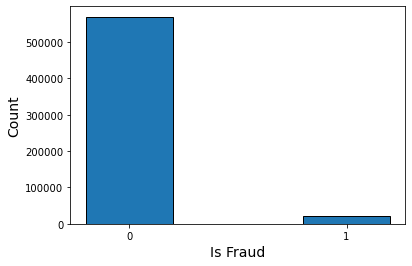

The rate of fraud transactions is 3.50 %


In [20]:
n_fraud=sum(df_train.iloc[:,1].values==1)
n_normal=sum(df_train.iloc[:,1].values==0)
rate_fraud=n_fraud/(n_fraud+n_normal)*100

fig, ax  = plt.subplots(figsize=(6, 4))
ax.hist(df_train.iloc[:,1].values, bins=[-0.2,0.2,0.8,1.2], ec="k")
ax.set_xticks((0,1))
ax.set_xlabel('Is Fraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()
print("The rate of fraud transactions is %.2f %%" %rate_fraud)

### Seaborn is a nice library. Try it

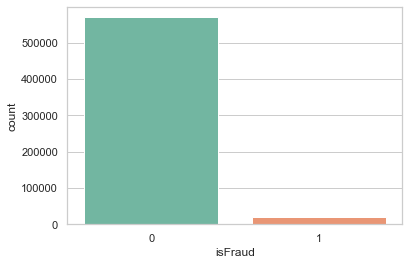

In [21]:
sns.set_theme(style="whitegrid")
ax=sns.countplot(x="isFraud", data=df_train, palette="Set2") #countplot is for categorical values
plt.show()

### <font color='blue'>STEP 2-c: the continuous features</font>

**STEP 2-c-1: TransactionDT**

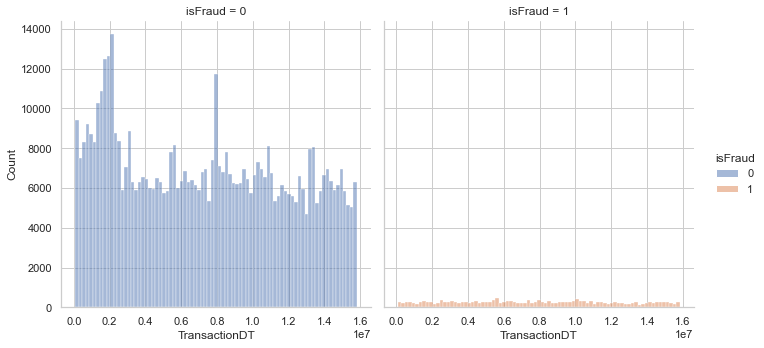

In [22]:
sns.displot(data=df_train, x="TransactionDT", col="isFraud",hue="isFraud")
plt.show()

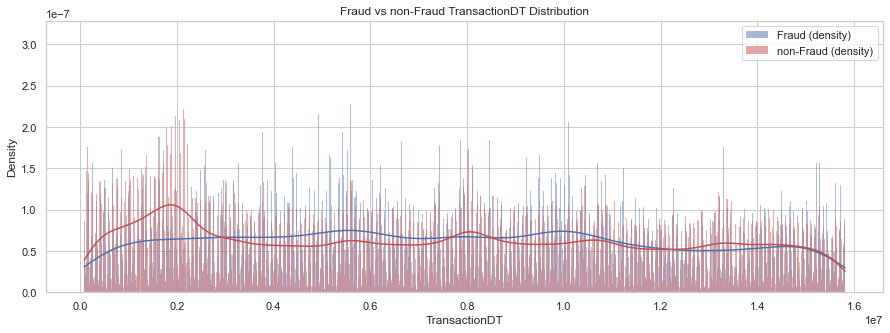

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(df_fraud["TransactionDT"], color='b', label='Fraud (density)',kde=True, stat="density", bins=1000)
sns.histplot(df_normal["TransactionDT"], color='r', label ='non-Fraud (density)',kde=True, stat="density",bins=1000)
plt.title('Fraud vs non-Fraud TransactionDT Distribution')
plt.legend()
plt.show()

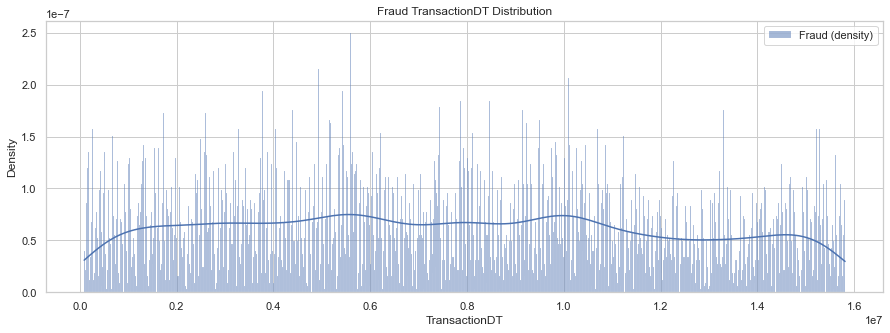

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(df_fraud["TransactionDT"], color='b', label='Fraud (density)',kde=True, stat="density", bins=1000)
plt.title('Fraud TransactionDT Distribution')
plt.legend()
plt.show()

### time-dependent peaks? #182 days

### Maybe the percentage of fraud transactions are higher around the time ~12AM - 4AM, while it is lower around the time ~ 7 AM - 11 AM. See the discussion: [link](https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400)  International fraud?

In [25]:
df_train.TransactionDT.isnull().sum() # No NaN values 

0

In [26]:
def count_hourly_transaction(df):
    
    a_day = 24*60*60
    date_steps=int(round(df["TransactionDT"].max()/a_day,0)-1)
    print("The total days in the data are %i" %date_steps)
    
    num_bins = 25
    bins = np.linspace(a_day, a_day*2, num_bins)

    stacked_value = np.zeros((num_bins - 1,))

    for date in range(date_steps):
        t_min = a_day + date * a_day
        t_max = t_min + a_day
    
        df_range = df[(df["TransactionDT"] < t_max) & (df["TransactionDT"] >= t_min)]
        target_value = df_range.TransactionDT.values - (date * a_day)
        binned_value = np.histogram(target_value,bins)
        binned_value = np.array(binned_value[0])
        stacked_value = stacked_value + binned_value

    stacked_value = stacked_value.transpose()
    x_values=np.linspace((bins[1]+bins[0])/2,(bins[-1]+bins[-2])/2,24)
    
    return stacked_value, x_values

The total days in the data are 182
The total days in the data are 182


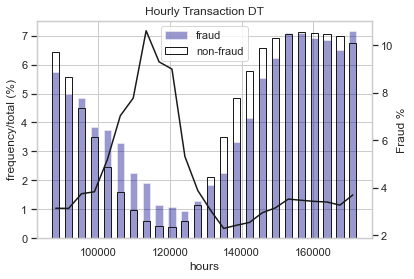

In [27]:
stacked_value, x_values = count_hourly_transaction(df_fraud)
stacked_value_percent = stacked_value/stacked_value.sum()*100

stacked_value_normal, x_values_normal = count_hourly_transaction(df_normal)
stacked_value_normal_percent = stacked_value_normal/stacked_value_normal.sum()*100

stacked_value_total = stacked_value_normal+stacked_value
percent_fraud = stacked_value/stacked_value_total* 100

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(x_values,stacked_value_percent,width = 2000, color='darkblue', alpha=0.4, label='fraud', edgecolor=None)
ax.bar(x_values_normal,stacked_value_normal_percent,width = 2000, fill=False, edgecolor='k', alpha=1, label='non-fraud')

ax.set_xlabel("hours")
ax.set_ylabel("frequency/total (%)")
ax2.set_ylabel('Fraud %')
ax2.plot(x_values,percent_fraud, 'k')
ax2.grid(visible=None)
ax.set_title("Hourly Transaction DT")
ax.legend(loc=0)
plt.show()

Compare my long, inefficient function with the simple, nice function below:
[Original Discussion](https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature)

In [28]:
def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    tname : str
        Name of the time column in df.
    """
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

In [29]:
df_train['hours'] = make_hour_feature(df_train)

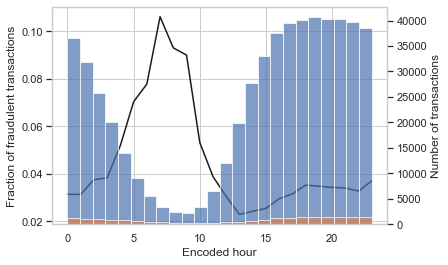

In [30]:
plt.plot(df_train.groupby('hours')['isFraud'].mean(), color='k')
ax = plt.gca()
ax2 = ax.twinx()
ax2.hist(df_train['hours'][df_train['isFraud']==0], alpha=0.7, bins=24 ,stacked=True)
ax2.hist(df_train['hours'][df_train['isFraud']==1], alpha=0.7, bins=24 ,stacked=True)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')
ax2.grid(visible=None)
ax2.set_ylabel('Number of transactions')
plt.show()

## It was pointed out that there seems a time difference between the training and test sets, which can cause problems

In [31]:
df_train["TransactionDT"].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [32]:
df_test["TransactionDT"].describe()

count    5.066910e+05
mean     2.692994e+07
std      4.756507e+06
min      1.840322e+07
25%      2.277154e+07
50%      2.720466e+07
75%      3.134856e+07
max      3.421434e+07
Name: TransactionDT, dtype: float64

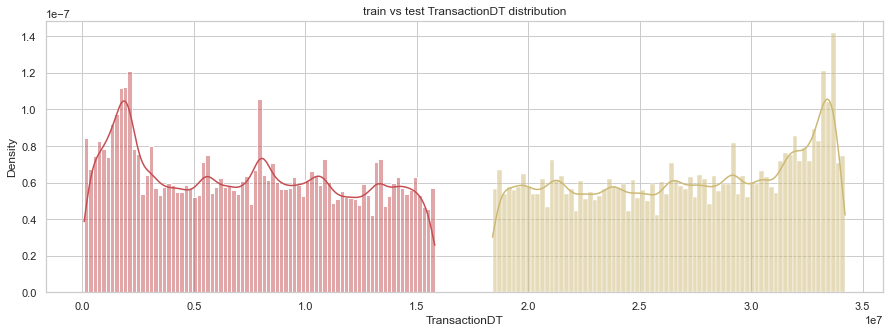

In [33]:
plt.figure(figsize=(15,5))
sns.histplot(df_train["TransactionDT"],color='r',label='Training set (density)',kde=True, stat="density")
sns.histplot(df_test["TransactionDT"],color='y',label='Test set (density)',kde=True, stat="density")
plt.title('train vs test TransactionDT distribution')
plt.show()

Train vs Test TransactionDT feature appear to be split by time
[Link](https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda)

**STEP 2-c-2: TransactionAmt**

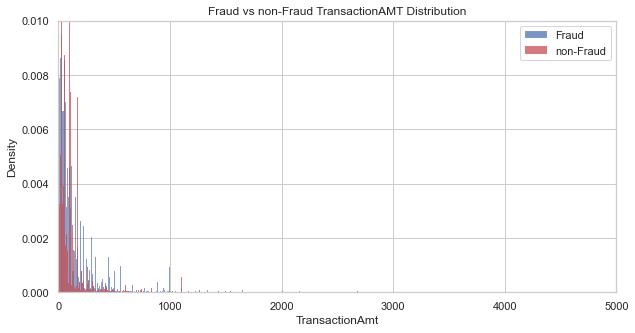

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df_fraud["TransactionAmt"], color = 'b', label='Fraud',stat="density")
sns.histplot(df_normal["TransactionAmt"], color = 'r', label ='non-Fraud',stat="density")
plt.title('Fraud vs non-Fraud TransactionAMT Distribution')
plt.legend()
plt.xlim([0,5000])
plt.ylim([0,0.01])
plt.show()

In [35]:
df_train['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [36]:
df_fraud['TransactionAmt'].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

In [37]:
df_normal['TransactionAmt'].describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

<Figure size 720x216 with 0 Axes>

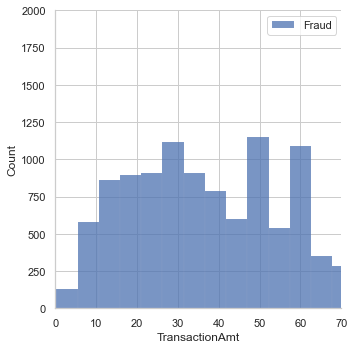

In [38]:
## Fraud $0-$70
plt.figure(figsize=(10,3))
sns.displot(data=df_fraud, x="TransactionAmt",bins=1000, label ='Fraud')
plt.ylim(0, 2000)
plt.xlim(0,70)
plt.legend()
plt.show()

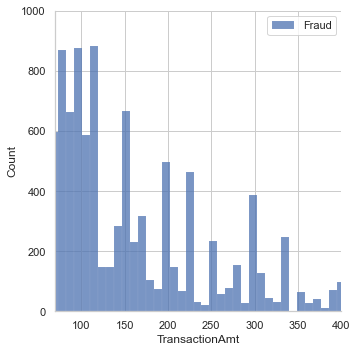

In [39]:
## Fraud $70-$400

sns.displot(data=df_fraud, x="TransactionAmt",label ='Fraud')
plt.ylim(0, 1000)
plt.xlim(70,400)
plt.legend()
plt.show()

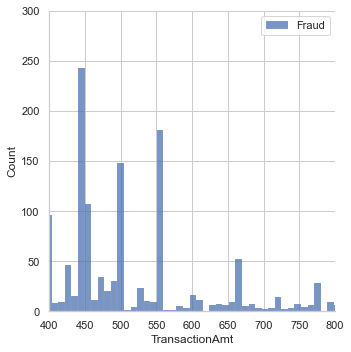

In [40]:
## Fraud $400-$800

sns.displot(data=df_fraud, x="TransactionAmt",label ='Fraud')
plt.ylim(0, 300)
plt.xlim(400,800)
plt.legend()
plt.show()

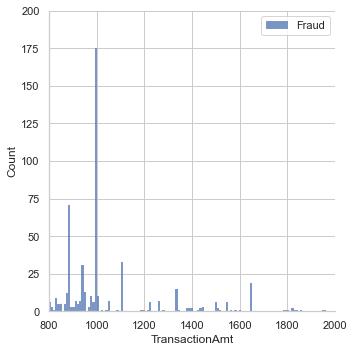

In [41]:
## Fraud $800-$2000

sns.displot(data=df_fraud, x="TransactionAmt",label ='Fraud')
plt.ylim(0, 200)
plt.xlim(800,2000)
plt.legend()
plt.show()

In [42]:
def integer_percentage(df, minAMT=0, df_type='Fraud'):
    
    """
    This function reads a DataFrame and a minimum amount threshold ($),
    and computes the percentage of transaction amounts that are integer.
    """
    
    if minAMT == 0:
        total_num = len(df)
        int_transactionAmt = df.TransactionAmt.values.astype(int)
        isInt = (int_transactionAmt == df.TransactionAmt.values)
        int_num = sum(isInt)
        perc = round(int_num/total_num, 3) * 100
        #print('%% of %s transaction amounts that are integer is %f' %(df_type, perc))
        flag = "$"+str(minAMT)
        flag2 = df_type
    
    elif minAMT != 0:
        df_min=df[df['TransactionAmt'] > minAMT]
        total_num = len(df_min)
        int_transactionAmt = df_min.TransactionAmt.values.astype(int)
        isInt = (int_transactionAmt == df_min.TransactionAmt.values)
        int_num = sum(isInt)
        perc = round(int_num/total_num, 3) * 100
        #print('%% of %s transaction amounts that are integer and larger than $%i is %f' %(df_type, minAMT, perc))
        flag = "$"+str(minAMT+1)
        flag2 = df_type
        
        
    return perc, flag, flag2
    

In [43]:
int_ptg_list = []

perc, flag, flag2 = integer_percentage(df_fraud,df_type='fraud')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_train,df_type='all')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_normal,df_type='normal')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_fraud,minAMT=49,df_type='fraud')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_train,minAMT=49,df_type='all')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_normal,minAMT=49,df_type='normal')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_fraud,minAMT=99,df_type='fraud')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_train,minAMT=99,df_type='all')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_normal,minAMT=99,df_type='normal')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_fraud,minAMT=199,df_type='fraud')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_train,minAMT=199,df_type='all')
int_ptg_list.append([perc, flag, flag2])

perc, flag, flag2 = integer_percentage(df_normal,minAMT=199,df_type='normal')
int_ptg_list.append([perc, flag, flag2])

In [44]:
names=['%', 'minAMT','transType']
df_int_ptg = pd.DataFrame(int_ptg_list, columns=names)

In [45]:
def multiple_percentage(df, minAMT=0, df_type='Fraud', multiple = 10):
    
    """
    This function reads a DataFrame and a minimum amount threshold ($),
    and computes the percentage of transaction amounts that are integer.
    """
    
    if minAMT == 0:
        total_num = len(df)
        isMultiple = (df.TransactionAmt.values % multiple == 0 )
        multiple_num = sum(isMultiple)
        perc = round(multiple_num/total_num, 3) * 100
        #print('%% of %s transaction amounts that are a multiple of %i is %f' %(df_type, multiple, perc))
        flag = "$"+str(minAMT)
        flag2 = df_type
        flag3 = "multiple of "+str(multiple)
        
    elif minAMT != 0:
        df_min=df[df['TransactionAmt'] > minAMT]
        total_num = len(df_min)
        isMultiple = (df_min.TransactionAmt.values % multiple == 0 )
        multiple_num = sum(isMultiple)
        perc = round(multiple_num/total_num, 3) * 100
        #print('%% of %s transaction amounts that are a multiple of %i and larger than $%i is %f' %(df_type, multiple, minAMT, perc))
        flag = "$"+str(minAMT+1)
        flag2 = df_type
        flag3 = "multiple of "+str(multiple)
        
    return perc, flag, flag2, flag3        

In [46]:
multiple10_ptg_list = []

In [47]:
perc, flag, flag2, flag3 = multiple_percentage(df_fraud,df_type='fraud',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,df_type='all',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,df_type='normal',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=49,df_type='fraud',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=49,df_type='all',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=49,df_type='normal',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=99,df_type='fraud',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=99,df_type='all',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=99,df_type='normal',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=199,df_type='fraud',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=199,df_type='all',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=199,df_type='normal',multiple=10)
multiple10_ptg_list.append([perc, flag, flag2, flag3])


In [48]:
multiple5_ptg_list = []

In [49]:
perc, flag, flag2, flag3 = multiple_percentage(df_fraud,df_type='fraud',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,df_type='all',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,df_type='normal',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=49,df_type='fraud',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=49,df_type='all',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=49,df_type='normal',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=99,df_type='fraud',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=99,df_type='all',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=99,df_type='normal',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_fraud,minAMT=199,df_type='fraud',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_train,minAMT=199,df_type='all',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

perc, flag, flag2, flag3 = multiple_percentage(df_normal,minAMT=199,df_type='normal',multiple=5)
multiple5_ptg_list.append([perc, flag, flag2, flag3])

In [50]:
names=['%', 'minAMT','transType', 'multiple']
df_multiple10_ptg = pd.DataFrame(multiple10_ptg_list, columns=names)
df_multiple5_ptg = pd.DataFrame(multiple5_ptg_list, columns=names)

plot : 
df_int_ptg
df_multiple10_ptg
df_multiple5_ptg

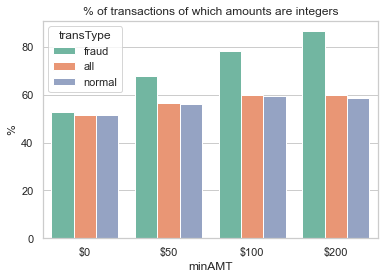

In [51]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="minAMT", y="%", hue="transType", data=df_int_ptg, palette="Set2")
plt.title("% of transactions of which amounts are integers" )
plt.show()

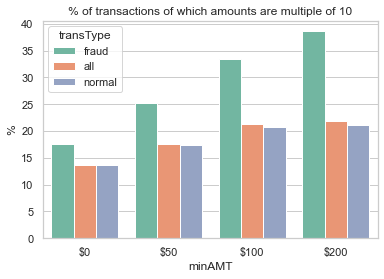

In [52]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="minAMT", y="%", hue="transType", data=df_multiple10_ptg, palette="Set2")
plt.title("%% of transactions of which amounts are %s" %df_multiple10_ptg.iloc[0,3])
plt.show()

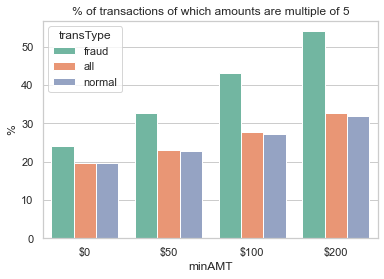

In [53]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="minAMT", y="%", hue="transType", data=df_multiple5_ptg, palette="Set2")
plt.title("%% of transactions of which amounts are %s" %df_multiple5_ptg.iloc[0,3])
plt.show()

In [54]:
## Hypothesis : Theives like buying gift cards, or something that they can easily sell for cash.
## Check the correlation with the Product CD 

ADD FEATURE

In [55]:
def integer_feature_one_hot(df):
    
    """
    This function reads a DataFrame and 
    creates a new feature 'IsIntAmt', which is either 0 or 1 
    (One Hot Categorical Variable). 1 = int
    """

    int_transactionAmt = df.TransactionAmt.values.astype(int)
    isInt = (int_transactionAmt == df.TransactionAmt.values)
    isInt = isInt.astype(int)

    return isInt

In [56]:
def multiple_feature_one_hot(df, multiple = 10):
    
    """
    This function reads a DataFrame and 
    creates a new feature 'IsMultiple#', which is either 0 or 1
    (One Hot Categorical Variable). 1 = Multiple of #. 
    The default # is 10. 
    """

    isMultiple = (df.TransactionAmt.values % multiple == 0 )
    isMultiple=isMultiple.astype(int)
        
    return isMultiple

In [57]:
isInt = integer_feature_one_hot(df_train)

In [58]:
isMultiple10 = multiple_feature_one_hot(df_train, multiple = 10)

In [59]:
isMultiple5 = multiple_feature_one_hot(df_train, multiple = 5)

In [60]:
df_train['IsIntAmt']=isInt
df_train['isMultiple10']=isMultiple10
df_train['isMultiple5']=isMultiple5

Percentage of fraud transaction based on the transaction amounts

In [61]:
df_train['New_TransactionAmt_Bin'] = pd.qcut(df_train['TransactionAmt'],20)
# Quantile-based discretization functionb
df_train.groupby('New_TransactionAmt_Bin')[['isFraud']].mean()

,isFraud
New_TransactionAmt_Bin,
"(0.25, 20.0]",0.076949
"(20.0, 25.95]",0.034675
"(25.95, 30.95]",0.032233
"(30.95, 35.95]",0.031837
"(35.95, 43.321]",0.036332
"(43.321, 49.0]",0.029453
"(49.0, 52.0]",0.025389
"(52.0, 57.95]",0.016306
"(57.95, 59.0]",0.021301


In [62]:
df_train[df_train['isFraud']==1].groupby('New_TransactionAmt_Bin')[['IsIntAmt']].mean()

,IsIntAmt
New_TransactionAmt_Bin,
"(0.25, 20.0]",0.129678
"(20.0, 25.95]",0.183852
"(25.95, 30.95]",0.291010
"(30.95, 35.95]",0.202899
"(35.95, 43.321]",0.334719
"(43.321, 49.0]",0.511424
"(49.0, 52.0]",0.694818
"(52.0, 57.95]",0.224138
"(57.95, 59.0]",0.877005


## Log transform 


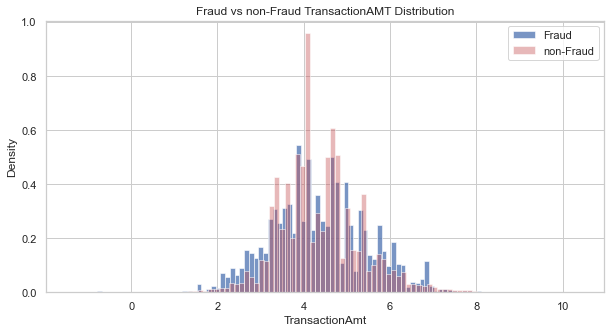

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(np.log(df_fraud["TransactionAmt"]), color = 'b', label='Fraud',stat="density")
sns.histplot(np.log(df_normal["TransactionAmt"]), color = 'r', label ='non-Fraud',stat="density", bins=100, alpha = 0.4)
plt.title('Fraud vs non-Fraud TransactionAMT Distribution')
plt.legend()
plt.show()

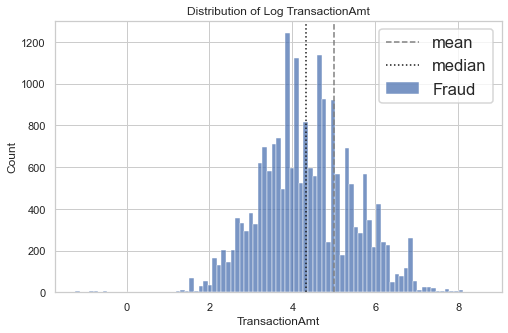

In [64]:
avg=np.log(df_fraud["TransactionAmt"].mean())
medn=np.log(df_fraud["TransactionAmt"].median())

plt.figure(figsize=(8,5))
sns.histplot(np.log(df_fraud["TransactionAmt"]), color = 'b', label ='Fraud')
plt.axvline(x=avg, color='gray', linestyle='--', label='mean')
plt.axvline(x=medn, color='k', linestyle=':', label='median')
plt.title("Distribution of Log TransactionAmt")
sns.set_context('talk', font_scale=1)
plt.legend(loc=0)
plt.show()

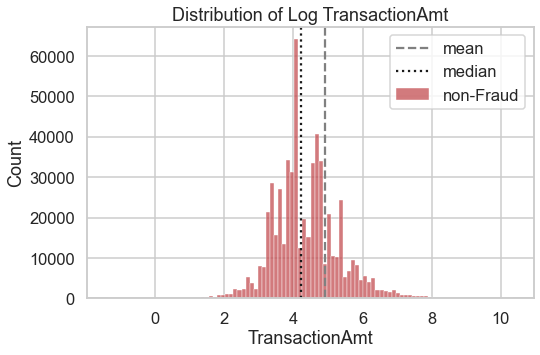

In [65]:
avg=np.log(df_normal["TransactionAmt"].mean())
medn=np.log(df_normal["TransactionAmt"].median())

plt.figure(figsize=(8,5))
sns.histplot(np.log(df_normal["TransactionAmt"]), color = 'r', label ='non-Fraud', bins =100)
plt.axvline(x=avg, color='gray', linestyle='--', label='mean')
plt.axvline(x=medn, color='k', linestyle=':', label='median')
plt.title("Distribution of Log TransactionAmt")

plt.legend(loc=0)
sns.set_context('talk', font_scale=1)

**STEP 2-c-3: dist1 & dist2**

In [66]:
df_train.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,hours,IsIntAmt,isMultiple10,isMultiple5,New_TransactionAmt_Bin
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

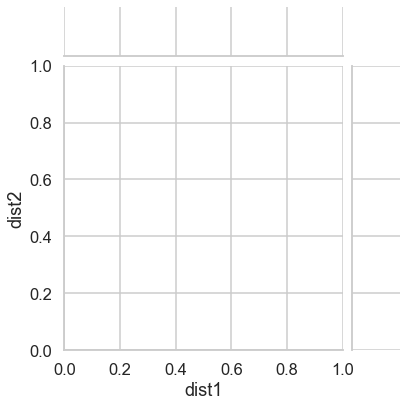

In [67]:
sns.jointplot(data=df_train, x="dist1", y="dist2", dropna=True)

No non-nan pair is available. 

In [68]:
df_train["dist1"].describe()

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

In [69]:
df_train["dist2"].describe()

count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64

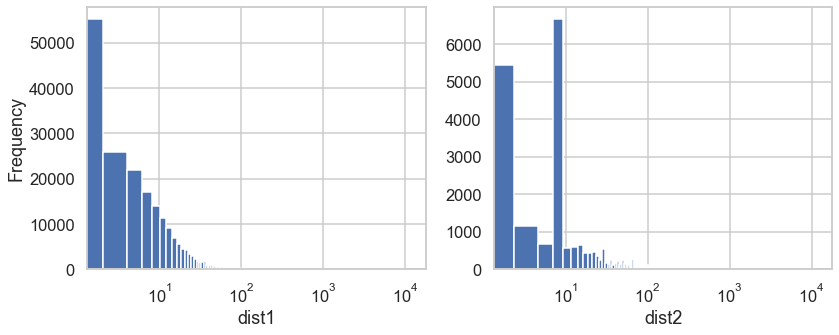

In [70]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharex=True, tight_layout=True)
ax[0].hist(df_train["dist1"], bins=5000)
ax[1].hist(df_train["dist2"], bins=5000)
ax[1].set_xscale('log')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('dist1')
ax[1].set_xlabel('dist2')
plt.show()

### <font color='blue'>STEP 2-d: the categorical features</font>

ProductCD, addr1, addr2, P_emaildomain, R_emaildomain, DeviceType, DeviceInfo

ProductCD

In [71]:
def CatDetail(df, cat_features):
    df_cat = df.loc[:,cat_features]
    for col, values in df_cat.iteritems():
        num_uniques = values.nunique()
        print ('{name}: {name_unique}'.format(name=col, name_unique=num_uniques))

In [72]:
cat_features = ['isFraud','ProductCD','addr1', 'addr2', 
                'P_emaildomain','R_emaildomain','DeviceType','DeviceInfo']
CatDetail(df_train, cat_features)

isFraud: 2
ProductCD: 5
addr1: 332
addr2: 74
P_emaildomain: 59
R_emaildomain: 60
DeviceType: 2
DeviceInfo: 1786


In [73]:
def PlotCatVal(df, col, perc='isFraud'):
    crs=pd.crosstab(df[col], df[perc], normalize='index')*100
    crs=crs.reset_index()
    crs.columns=[col,'NoFraud', 'Fraud']

    
    sns.set_style('ticks')
    plt.figure(figsize=(20,5))
    g=sns.countplot(x=col, data=df, 
                    order=list(crs[col].values))
    g.set_xticklabels(g.get_xticklabels(),rotation=45)

    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=crs, 
                       order=list(crs[col].values), color='k', linewidth=0.1)

    sns.set_context('talk', font_scale=1)
    if perc=='isFraud':
        gt.set_ylabel("Fraud rates (%)")
    else:
        gt.set_ylabel(f"{perc} rates (%)")

    total =len(df)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=14)

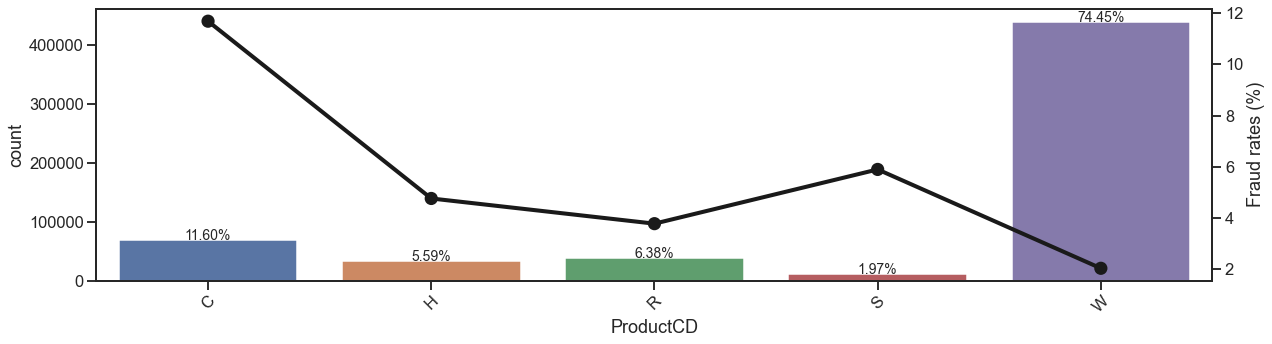

In [74]:
PlotCatVal(df_train, 'ProductCD')

In [75]:
#df_train.groupby('ProductCD')[['isMultiple5']].mean()*100

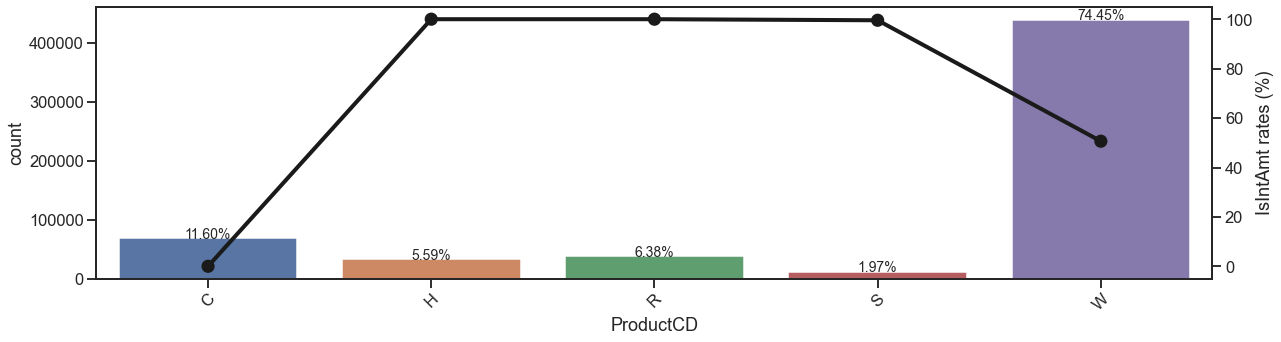

In [76]:
PlotCatVal(df_train, 'ProductCD','IsIntAmt')

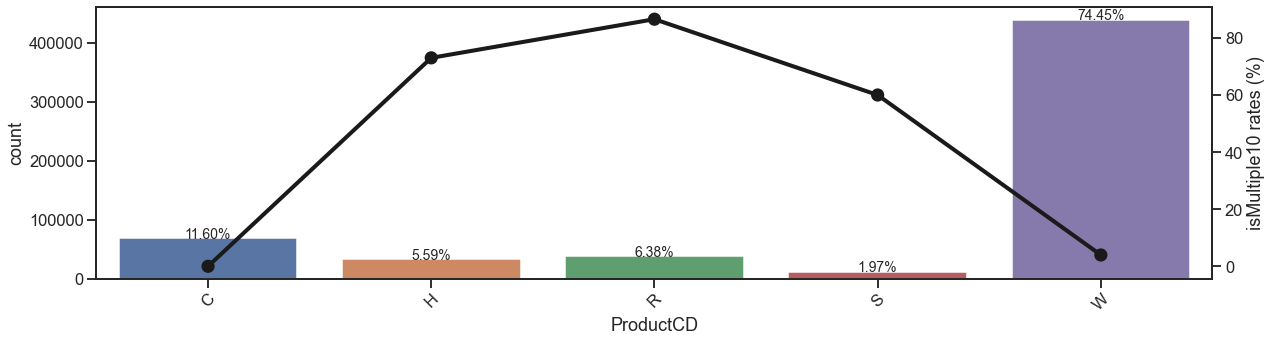

In [77]:
PlotCatVal(df_train, 'ProductCD','isMultiple10')

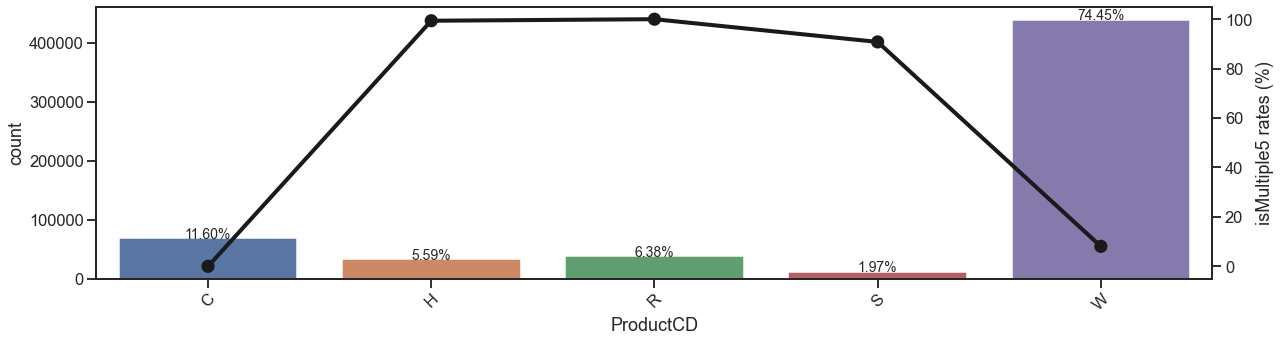

In [78]:
PlotCatVal(df_train, 'ProductCD','isMultiple5')

addr1-addr2

In [79]:
df_train['addr1'].isnull().sum()/len(df_train)

0.1112642666034477

In [80]:
df_train['addr2'].isnull().sum()/len(df_train)

0.1112642666034477

In [81]:
df_train['addr1'].value_counts().head(30).sum()

467955

In [82]:
df_train['addr2'].value_counts().head(10)

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64

In [83]:
def replaceOthers(df, col, thrsh = 100):
    """
    
    """
    cond = df[col].value_counts()
    df[col] = np.where((df[col].isin(cond.index[cond >= thrsh ])) | (df[col].isnull()==True), df[col], "Others")
    df[col] = df[col].replace('nan', np.nan)
    return df

In [84]:
df_train=replaceOthers(df_train, 'addr1', thrsh=5000)
df_train=replaceOthers(df_train, 'addr2', thrsh=50)
df_test=replaceOthers(df_test, 'addr1', thrsh=5000)
df_test=replaceOthers(df_test, 'addr2', thrsh=50)

In [85]:
df_train['addr1'].fillna("NoInf", inplace=True)
df_test['addr1'].fillna("NoInf", inplace=True)

df_train['addr2'].fillna("NoInf", inplace=True)
df_test['addr2'].fillna("NoInf", inplace=True)

In [87]:
#type(df_train.loc[590521,['addr1']].values[0])

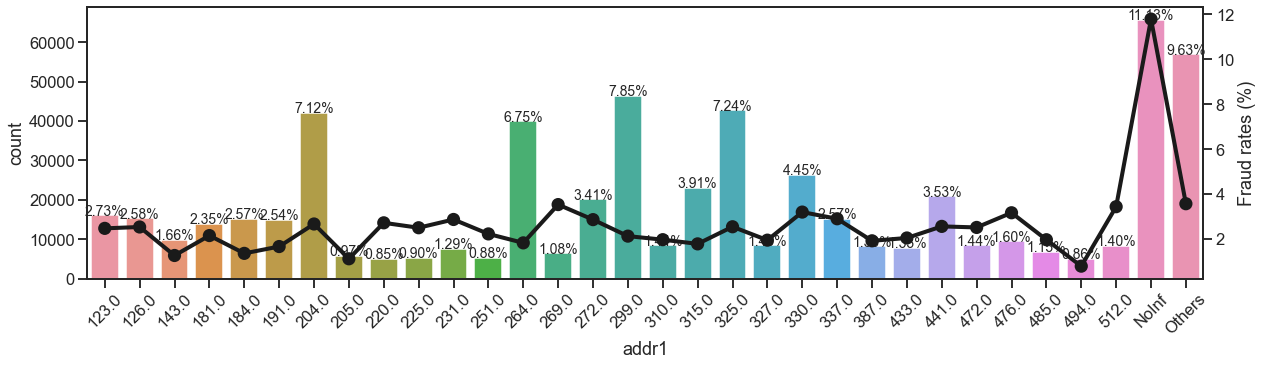

In [88]:
PlotCatVal(df_train, 'addr1')

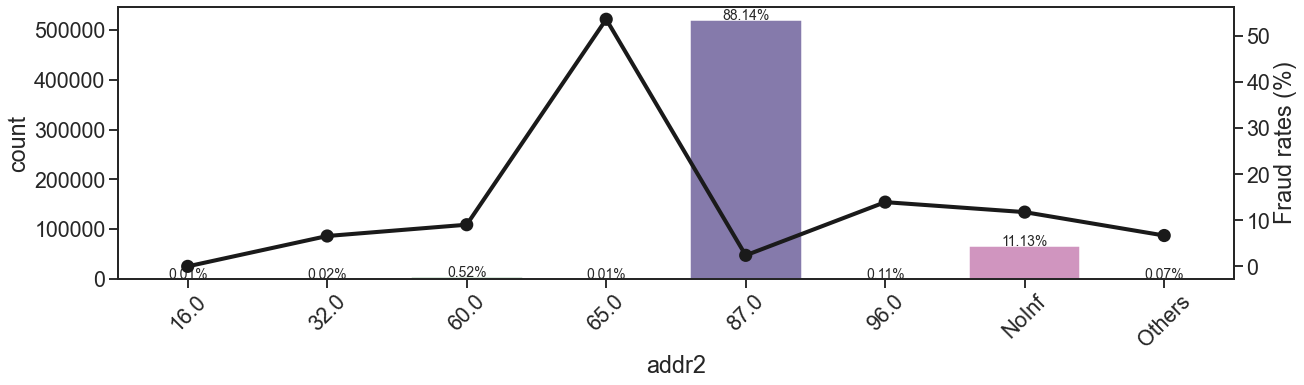

In [90]:
PlotCatVal(df_train, 'addr2')

"P_emaildomain" & "R_emaildomain"
- Purchaser & Recipient email Domain 

In [97]:
df_train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

In [99]:
google_list=['gmail.com', 'gmail']
df_train.loc[df_train['P_emaildomain'].isin(google_list),'P_emaildomain'] = 'Google'
#df_train['P_emaildomain'].isin(google_list) <- True or False


yahoo_list=['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk', 
            'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']
df_train.loc[df_train['P_emaildomain'].isin(yahoo_list), 'P_emaildomain'] = 'Yahoo Mail'


msft_list=['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
           'hotmail.es','hotmail.co.uk', 'hotmail.de',
           'outlook.es', 'live.com', 'live.fr', 'hotmail.fr']
df_train.loc[df_train['P_emaildomain'].isin(msft_list), 'P_emaildomain'] = 'Microsoft'


df_train.loc[df_train['P_emaildomain'].isin(df_train['P_emaildomain'].value_counts()[df_train.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
df_train['P_emaildomain'].fillna("NoInf", inplace=True)

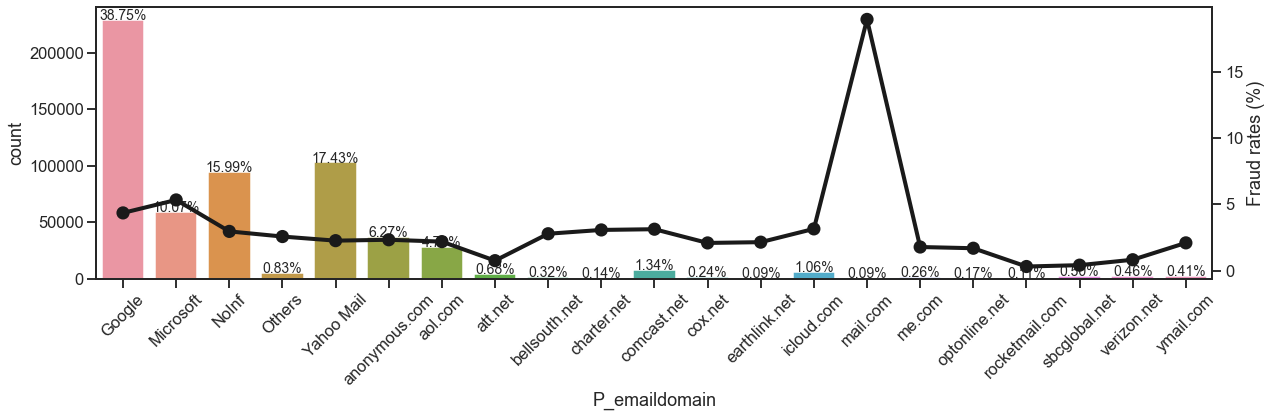

In [100]:
PlotCatVal(df_train, 'P_emaildomain')

In [106]:
df_train['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [107]:
df_train.loc[df_train['R_emaildomain'].isin(google_list),'R_emaildomain'] = 'Google'

df_train.loc[df_train['R_emaildomain'].isin(yahoo_list), 'R_emaildomain'] = 'Yahoo Mail'

df_train.loc[df_train['R_emaildomain'].isin(msft_list), 'R_emaildomain'] = 'Microsoft'

df_train.loc[df_train['R_emaildomain'].isin(df_train['R_emaildomain'].value_counts()[df_train.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

df_train['R_emaildomain'].fillna("NoInf", inplace=True)

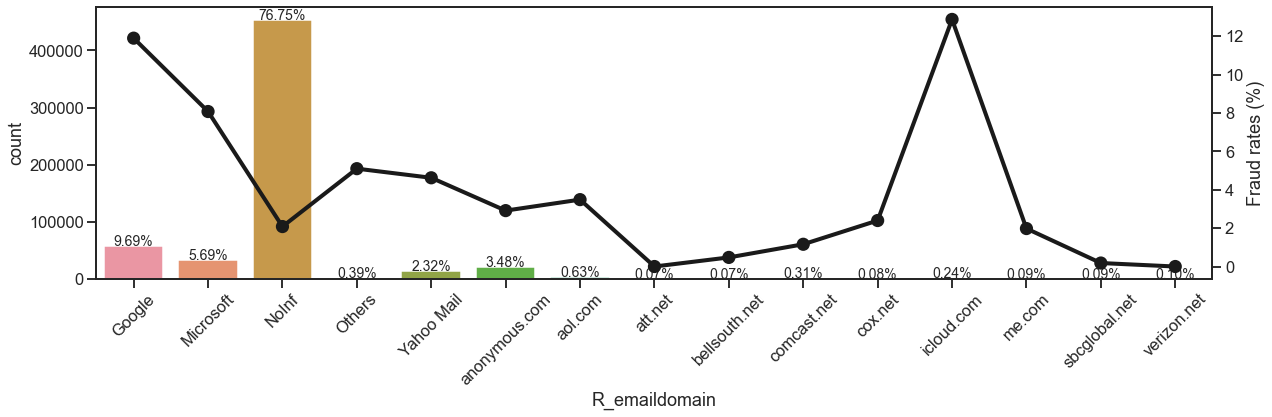

In [108]:
PlotCatVal(df_train, 'R_emaildomain')

In [112]:
df_train['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

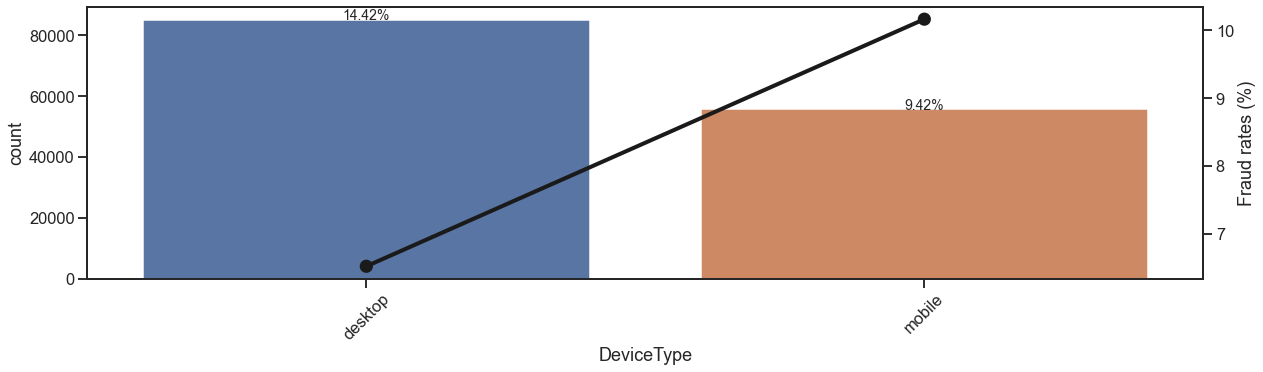

In [115]:
PlotCatVal(df_train, 'DeviceType')

In [116]:
df_train['DeviceInfo'].value_counts()

Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

### <font color='blue'>STEP 2-e: the group features</font>

<Figure size 576x432 with 0 Axes>

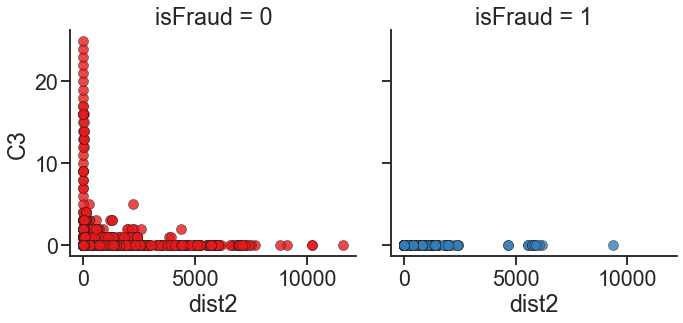

In [89]:
plt.figure(figsize=(8,6)) 
sns.set_context('talk', font_scale=1.3)
sns.lmplot(x='dist2', y='C3', hue='isFraud', col='isFraud',data=df_train, palette='Set1', line_kws={"lw":0,"alpha":0},
           markers=['o','o'], scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor': 'k'}, ci=None)